In [1]:
import pandas as pd

data=pd.read_csv("df_replaced.csv" )

#data


# Specify the columns you want to keep
#columns_to_keep = ['datetime','Load']

# Use indexing to select the desired columns
#df = data[columns_to_keep]
# set the 'datetime_column' as the index
#df.set_index('datetime', inplace=True)
data

,datetime,Load
0,2019-03-21 00:00:00,352.862799
1,2019-03-21 01:00:00,330.444853
2,2019-03-21 02:00:00,287.419792
3,2019-03-21 03:00:00,258.110368
4,2019-03-21 04:00:00,247.745866
...,...,...
22003,2021-09-22 19:00:00,632.235500
22004,2021-09-22 20:00:00,612.703162
22005,2021-09-22 21:00:00,589.574385
22006,2021-09-22 22:00:00,561.323968


In [2]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [3]:
df=data

In [4]:
df.dtypes

datetime    datetime64[ns]
Load               float64
dtype: object

In [5]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 4)

In [6]:
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
X = df.drop(labels=[], axis=1)
y = df['Load']

In [7]:
y

datetime
2019-03-21 00:00:00    352.862799
2019-03-21 01:00:00    330.444853
2019-03-21 02:00:00    287.419792
2019-03-21 03:00:00    258.110368
2019-03-21 04:00:00    247.745866
                          ...    
2021-09-22 19:00:00    632.235500
2021-09-22 20:00:00    612.703162
2021-09-22 21:00:00    589.574385
2021-09-22 22:00:00    561.323968
2021-09-22 23:00:00    522.105758
Name: Load, Length: 22008, dtype: float64

In [8]:
X

,Load
datetime,
2019-03-21 00:00:00,352.862799
2019-03-21 01:00:00,330.444853
2019-03-21 02:00:00,287.419792
2019-03-21 03:00:00,258.110368
2019-03-21 04:00:00,247.745866
...,...
2021-09-22 19:00:00,632.235500
2021-09-22 20:00:00,612.703162
2021-09-22 21:00:00,589.574385


In [9]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [10]:
X_train.index

DatetimeIndex(['2019-03-21 00:00:00', '2019-03-21 01:00:00',
               '2019-03-21 02:00:00', '2019-03-21 03:00:00',
               '2019-03-21 04:00:00', '2019-03-21 05:00:00',
               '2019-03-21 06:00:00', '2019-03-21 07:00:00',
               '2019-03-21 08:00:00', '2019-03-21 09:00:00',
               ...
               '2021-03-23 05:00:00', '2021-03-23 06:00:00',
               '2021-03-23 07:00:00', '2021-03-23 08:00:00',
               '2021-03-23 09:00:00', '2021-03-23 10:00:00',
               '2021-03-23 11:00:00', '2021-03-23 12:00:00',
               '2021-03-23 13:00:00', '2021-03-23 14:00:00'],
              dtype='datetime64[ns]', name='datetime', length=17607, freq=None)

In [11]:
X_test.index

DatetimeIndex(['2021-03-23 15:00:00', '2021-03-23 16:00:00',
               '2021-03-23 17:00:00', '2021-03-23 18:00:00',
               '2021-03-23 19:00:00', '2021-03-23 20:00:00',
               '2021-03-23 21:00:00', '2021-03-23 22:00:00',
               '2021-03-23 23:00:00', '2021-03-24 00:00:00',
               ...
               '2021-09-22 14:00:00', '2021-09-22 15:00:00',
               '2021-09-22 16:00:00', '2021-09-22 17:00:00',
               '2021-09-22 18:00:00', '2021-09-22 19:00:00',
               '2021-09-22 20:00:00', '2021-09-22 21:00:00',
               '2021-09-22 22:00:00', '2021-09-22 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=4401, freq=None)

<Axes: xlabel='datetime'>

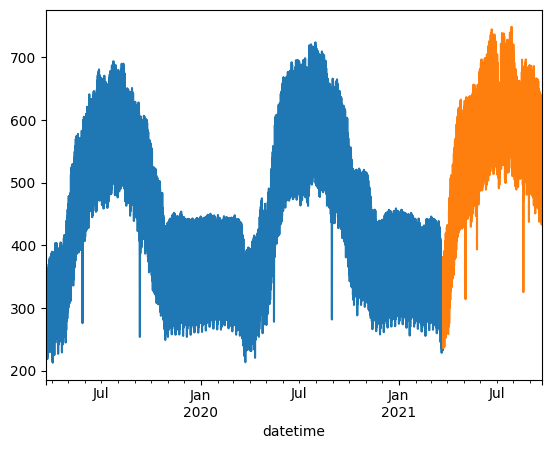

In [12]:
def price2num(x):
    if type(x) == str:
        x = x.strip('$').replace(',', '')
    return float(x)


#function to convert price from string to floats
y_train=y_train.apply(price2num)
y_train.groupby('datetime').mean().plot()
y_test=y_test.apply(price2num)
y_test.groupby('datetime').mean().plot()

In [13]:
print(X_train.shape, X_test.shape)

(17607, 1) (4401, 1)


In [14]:
y_train.shape

(17607,)

In [15]:
from sklearn.preprocessing import MinMaxScaler

f_columns = ['Load']  # Define a list of column names to be transformed

f_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for feature transformation
t_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for target transformation

f_transformer = f_transformer.fit(X_train[f_columns].to_numpy())  # Fit the feature transformer to the training data
t_transformer = t_transformer.fit(y_train.to_numpy().reshape(-1, 1))  # Fit the target transformer to the training data

X_train.loc[:, f_columns] = f_transformer.transform(X_train[f_columns].to_numpy())  # Apply feature transformation to the training data
y_train = t_transformer.transform(y_train.to_numpy().reshape(-1, 1))  # Apply target transformation to the training data

X_test.loc[:, f_columns] = f_transformer.transform(X_test[f_columns].to_numpy())  # Apply feature transformation to the test data
y_test = t_transformer.transform(y_test.to_numpy().reshape(-1, 1))  # Apply target transformation to the test data

<ipython-input-15-4d9097f2dad2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, f_columns] = f_transformer.transform(X_train[f_columns].to_numpy())  # Apply feature transformation to the training data
<ipython-input-15-4d9097f2dad2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, f_columns] = f_transformer.transform(X_test[f_columns].to_numpy())  # Apply feature transformation to the test data


In [16]:
import numpy as np

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [17]:
time_steps = 24  # Set the number of time steps to 24

X_train, y_train = create_dataset(X_train, y_train, time_steps)  # Create the training dataset using the 'create_dataset' function

X_test, y_test = create_dataset(X_test, y_test, time_steps)  # Create the test dataset using the 'create_dataset' function



print(X_train.shape,y_train.shape,X_test.shape,  y_test.shape)

(17583, 24, 1) (17583, 1) (4377, 24, 1) (4377, 1)


In [18]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.1 MB/s eta 0:00:00


In [19]:
import optuna

In [20]:
import math
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

import tensorflow as tf
from keras.callbacks import EarlyStopping


In [21]:

def build_model(num_layers, units, dropout_rates, learning_rate):
    model = keras.Sequential()

    for i in range(num_layers):
        return_sequences = (i != num_layers - 1)  # Set return_sequences=True for all but the last layer

        model.add(layers.LSTM(units=units[i], input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=return_sequences))
        model.add(layers.Dropout(dropout_rates[i]))

    model.add(layers.Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error'
      # , metrics=['mae','mape']
        )
    return model

In [22]:
# Define the objective function for optimization
def objective(trial):
    # Define the hyperparameters to be optimized
    num_layers = trial.suggest_int("num_layers", 1, 2)
    units = [trial.suggest_int(f"units_{i}", 150, 250) for i in range(num_layers)]
    dropout_rates = [trial.suggest_uniform(f"dropout_{i}", 0.0, 0.5) for i in range(num_layers)]
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    # Build the model based on the suggested hyperparameters
    model = build_model(num_layers, units, dropout_rates, learning_rate)



    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
       patience=2,
        restore_best_weights=True
    )



    # Train the model
    history = model.fit(
        X_train,
        y_train,
        epochs=50,
        batch_size = batch_size,
        validation_split=0.2,
        callbacks=[early_stopping]
        )

    # Return the validation loss as the objective value to minimize
    return np.min(history.history["val_loss"])


pruner = optuna.pruners.PercentilePruner(percentile=70)  # Adjust the percentile value as needed
#pruner = optuna.pruners.MedianPruner()
# Optimize the hyperparameters using Bayesian optimization
study = optuna.create_study( sampler=optuna.samplers.TPESampler(), direction="minimize" , pruner=pruner)
study.optimize(objective, n_trials=20)

# Get the best hyperparameters and the corresponding objective value
best_params = study.best_params
best_value = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Objective Value:", best_value)

# Build the final model with the best hyperparameters
#best_model = build_model(best_params["num_layers"],
  #                       [best_params[f"units_{i}"] for i in range(best_params["num_layers"])],
          #               [best_params[f"dropout_{i}"] for i in range(best_params["num_layers"])])

[I 2024-04-05 08:07:49,735] A new study created in memory with name: no-name-860ad649-d6a8-4f08-a420-f0d5a97ab0d6
<ipython-input-22-4135a6c9101c>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rates = [trial.suggest_uniform(f"dropout_{i}", 0.0, 0.5) for i in range(num_layers)]
<ipython-input-22-4135a6c9101c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)


Epoch 1/50
880/880 [==============================] - 21s 22ms/step - loss: 0.0105 - val_loss: 0.0021
Epoch 2/50
880/880 [==============================] - 19s 21ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 3/50
880/880 [==============================] - 19s 22ms/step - loss: 0.0026 - val_loss: 0.0010
Epoch 4/50
880/880 [==============================] - 21s 24ms/step - loss: 0.0020 - val_loss: 7.6767e-04
Epoch 5/50
880/880 [==============================] - 19s 21ms/step - loss: 0.0017 - val_loss: 8.8642e-04
Epoch 6/50
880/880 [==============================] - 20s 22ms/step - loss: 0.0016 - val_loss: 6.0244e-04
Epoch 7/50
880/880 [==============================] - 18s 20ms/step - loss: 0.0014 - val_loss: 4.9007e-04
Epoch 8/50
880/880 [==============================] - 18s 21ms/step - loss: 0.0013 - val_loss: 5.0875e-04
Epoch 9/50
880/880 [==============================] - 18s 20ms/step - loss: 0.0012 - val_loss: 5.2641e-04


[I 2024-04-05 08:10:42,397] Trial 0 finished with value: 0.0004900686908513308 and parameters: {'num_layers': 1, 'units_0': 164, 'dropout_0': 0.2875301019349842, 'learning_rate': 0.0005566915393669472, 'batch_size': 16}. Best is trial 0 with value: 0.0004900686908513308.


Epoch 1/50
110/110 [==============================] - 9s 60ms/step - loss: 0.0149 - val_loss: 0.0039
Epoch 2/50
110/110 [==============================] - 7s 64ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 3/50
110/110 [==============================] - 7s 62ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 4/50
110/110 [==============================] - 7s 60ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 5/50
110/110 [==============================] - 7s 63ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 6/50
110/110 [==============================] - 6s 57ms/step - loss: 0.0015 - val_loss: 8.0927e-04
Epoch 7/50
110/110 [==============================] - 6s 59ms/step - loss: 0.0015 - val_loss: 7.3156e-04
Epoch 8/50
110/110 [==============================] - 6s 54ms/step - loss: 0.0012 - val_loss: 7.2091e-04
Epoch 9/50
110/110 [==============================] - 6s 59ms/step - loss: 0.0012 - val_loss: 6.3792e-04
Epoch 10/50
110/110 [==============================] - 6s 55ms/step - loss:

[I 2024-04-05 08:11:56,535] Trial 1 finished with value: 0.0006379237747751176 and parameters: {'num_layers': 1, 'units_0': 161, 'dropout_0': 0.00993710453959945, 'learning_rate': 0.0013355452014481891, 'batch_size': 128}. Best is trial 0 with value: 0.0004900686908513308.


Epoch 1/50
220/220 [==============================] - 35s 146ms/step - loss: 1.1549 - val_loss: 0.0019
Epoch 2/50
220/220 [==============================] - 31s 143ms/step - loss: 0.0136 - val_loss: 0.0030
Epoch 3/50
220/220 [==============================] - 30s 139ms/step - loss: 0.0102 - val_loss: 0.0021


[I 2024-04-05 08:13:44,412] Trial 2 finished with value: 0.0018604649230837822 and parameters: {'num_layers': 2, 'units_0': 209, 'units_1': 235, 'dropout_0': 0.1628019237235208, 'dropout_1': 0.15416756799147746, 'learning_rate': 0.045280174126394554, 'batch_size': 64}. Best is trial 0 with value: 0.0004900686908513308.


Epoch 1/50
440/440 [==============================] - 14s 29ms/step - loss: 0.0156 - val_loss: 0.0039
Epoch 2/50
440/440 [==============================] - 13s 29ms/step - loss: 0.0046 - val_loss: 0.0023
Epoch 3/50
440/440 [==============================] - 13s 30ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 4/50
440/440 [==============================] - 13s 29ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 5/50
440/440 [==============================] - 13s 29ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 6/50
440/440 [==============================] - 13s 29ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 7/50
440/440 [==============================] - 13s 29ms/step - loss: 0.0017 - val_loss: 9.2923e-04
Epoch 8/50
440/440 [==============================] - 13s 29ms/step - loss: 0.0016 - val_loss: 8.1086e-04
Epoch 9/50
440/440 [==============================] - 13s 29ms/step - loss: 0.0014 - val_loss: 7.2860e-04
Epoch 10/50
440/440 [==============================] - 13s 29ms/step -

[I 2024-04-05 08:18:24,594] Trial 3 finished with value: 0.0004077852063346654 and parameters: {'num_layers': 1, 'units_0': 183, 'dropout_0': 0.09486264349656731, 'learning_rate': 0.0003403119654189989, 'batch_size': 32}. Best is trial 3 with value: 0.0004077852063346654.


Epoch 1/50
110/110 [==============================] - 25s 200ms/step - loss: 0.0149 - val_loss: 0.0034
Epoch 2/50
110/110 [==============================] - 20s 185ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 3/50
110/110 [==============================] - 21s 187ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 4/50
110/110 [==============================] - 21s 187ms/step - loss: 0.0031 - val_loss: 9.9526e-04
Epoch 5/50
110/110 [==============================] - 20s 185ms/step - loss: 0.0029 - val_loss: 9.3985e-04
Epoch 6/50
110/110 [==============================] - 20s 185ms/step - loss: 0.0024 - val_loss: 6.9447e-04
Epoch 7/50
110/110 [==============================] - 20s 181ms/step - loss: 0.0023 - val_loss: 6.6752e-04
Epoch 8/50
110/110 [==============================] - 20s 184ms/step - loss: 0.0021 - val_loss: 6.4852e-04
Epoch 9/50
110/110 [==============================] - 20s 185ms/step - loss: 0.0020 - val_loss: 6.5768e-04
Epoch 10/50
110/110 [============================

[I 2024-04-05 08:24:25,084] Trial 4 finished with value: 0.0004003633512184024 and parameters: {'num_layers': 2, 'units_0': 205, 'units_1': 190, 'dropout_0': 0.4155898230267578, 'dropout_1': 0.4567102828590725, 'learning_rate': 0.002393767021366827, 'batch_size': 128}. Best is trial 4 with value: 0.0004003633512184024.


Epoch 1/50
220/220 [==============================] - 10s 38ms/step - loss: 0.0078 - val_loss: 0.0029
Epoch 2/50
220/220 [==============================] - 7s 34ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 3/50
220/220 [==============================] - 8s 37ms/step - loss: 0.0014 - val_loss: 5.1307e-04
Epoch 4/50
220/220 [==============================] - 8s 37ms/step - loss: 0.0012 - val_loss: 4.0039e-04
Epoch 5/50
220/220 [==============================] - 8s 34ms/step - loss: 0.0011 - val_loss: 3.4626e-04
Epoch 6/50
220/220 [==============================] - 8s 37ms/step - loss: 9.5358e-04 - val_loss: 4.1051e-04
Epoch 7/50
220/220 [==============================] - 8s 38ms/step - loss: 8.6333e-04 - val_loss: 4.7549e-04


[I 2024-04-05 08:26:18,564] Trial 5 finished with value: 0.0003462629101704806 and parameters: {'num_layers': 1, 'units_0': 164, 'dropout_0': 0.2104918714151926, 'learning_rate': 0.006839991950607957, 'batch_size': 64}. Best is trial 5 with value: 0.0003462629101704806.


Epoch 1/50
220/220 [==============================] - 13s 51ms/step - loss: 0.1209 - val_loss: 0.0142
Epoch 2/50
220/220 [==============================] - 11s 51ms/step - loss: 0.0167 - val_loss: 0.0136
Epoch 3/50
220/220 [==============================] - 11s 49ms/step - loss: 0.0161 - val_loss: 0.0130
Epoch 4/50
220/220 [==============================] - 11s 48ms/step - loss: 0.0155 - val_loss: 0.0125
Epoch 5/50
220/220 [==============================] - 11s 49ms/step - loss: 0.0149 - val_loss: 0.0119
Epoch 6/50
220/220 [==============================] - 11s 49ms/step - loss: 0.0141 - val_loss: 0.0113
Epoch 7/50
220/220 [==============================] - 11s 49ms/step - loss: 0.0133 - val_loss: 0.0106
Epoch 8/50
220/220 [==============================] - 11s 49ms/step - loss: 0.0124 - val_loss: 0.0097
Epoch 9/50
220/220 [==============================] - 10s 48ms/step - loss: 0.0113 - val_loss: 0.0087
Epoch 10/50
220/220 [==============================] - 10s 46ms/step - loss: 0.010

[I 2024-04-05 08:34:04,974] Trial 6 finished with value: 0.001917326240800321 and parameters: {'num_layers': 1, 'units_0': 213, 'dropout_0': 0.04544839711319476, 'learning_rate': 1.6689845572916593e-05, 'batch_size': 64}. Best is trial 5 with value: 0.0003462629101704806.


Epoch 1/50
440/440 [==============================] - 18s 38ms/step - loss: 0.0212 - val_loss: 0.0093
Epoch 2/50
440/440 [==============================] - 17s 38ms/step - loss: 0.0085 - val_loss: 0.0038
Epoch 3/50
440/440 [==============================] - 16s 37ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 4/50
440/440 [==============================] - 16s 37ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 5/50
440/440 [==============================] - 17s 38ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 6/50
440/440 [==============================] - 16s 37ms/step - loss: 0.0039 - val_loss: 0.0022
Epoch 7/50
440/440 [==============================] - 17s 38ms/step - loss: 0.0037 - val_loss: 0.0020
Epoch 8/50
440/440 [==============================] - 16s 37ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 9/50
440/440 [==============================] - 17s 38ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 10/50
440/440 [==============================] - 16s 36ms/step - loss: 0.002

[I 2024-04-05 08:38:50,649] Trial 7 finished with value: 0.0013999699149280787 and parameters: {'num_layers': 1, 'units_0': 244, 'dropout_0': 0.11632600030313711, 'learning_rate': 7.199706013057105e-05, 'batch_size': 32}. Best is trial 5 with value: 0.0003462629101704806.


Epoch 1/50
440/440 [==============================] - 35s 74ms/step - loss: 0.2140 - val_loss: 0.0119
Epoch 2/50
440/440 [==============================] - 32s 72ms/step - loss: 0.0819 - val_loss: 0.3462
Epoch 3/50
440/440 [==============================] - 32s 73ms/step - loss: 0.0787 - val_loss: 0.0458


[I 2024-04-05 08:40:45,186] Trial 8 finished with value: 0.011897306889295578 and parameters: {'num_layers': 2, 'units_0': 169, 'units_1': 218, 'dropout_0': 0.24316175778144677, 'dropout_1': 0.043490258126136216, 'learning_rate': 0.019737466638097702, 'batch_size': 32}. Best is trial 5 with value: 0.0003462629101704806.


Epoch 1/50
110/110 [==============================] - 8s 56ms/step - loss: 0.0176 - val_loss: 0.0039
Epoch 2/50
110/110 [==============================] - 6s 55ms/step - loss: 0.0051 - val_loss: 0.0023
Epoch 3/50
110/110 [==============================] - 6s 57ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 4/50
110/110 [==============================] - 6s 51ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 5/50
110/110 [==============================] - 6s 56ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 6/50
110/110 [==============================] - 6s 52ms/step - loss: 0.0021 - val_loss: 7.3713e-04
Epoch 7/50
110/110 [==============================] - 6s 56ms/step - loss: 0.0019 - val_loss: 7.0421e-04
Epoch 8/50
110/110 [==============================] - 6s 52ms/step - loss: 0.0017 - val_loss: 7.2929e-04
Epoch 9/50
110/110 [==============================] - 6s 57ms/step - loss: 0.0017 - val_loss: 5.6369e-04
Epoch 10/50
110/110 [==============================] - 6s 52ms/step - loss:

[I 2024-04-05 08:43:01,960] Trial 9 finished with value: 0.00043575334711931646 and parameters: {'num_layers': 1, 'units_0': 165, 'dropout_0': 0.3863479818796548, 'learning_rate': 0.0034492548165647053, 'batch_size': 128}. Best is trial 5 with value: 0.0003462629101704806.


Epoch 1/50
220/220 [==============================] - 23s 92ms/step - loss: 0.0320 - val_loss: 0.0035
Epoch 2/50
220/220 [==============================] - 20s 90ms/step - loss: 0.0051 - val_loss: 0.0014
Epoch 3/50
220/220 [==============================] - 19s 88ms/step - loss: 0.0033 - val_loss: 8.5111e-04
Epoch 4/50
220/220 [==============================] - 20s 91ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 5/50
220/220 [==============================] - 20s 90ms/step - loss: 0.0019 - val_loss: 6.1789e-04
Epoch 6/50
220/220 [==============================] - 20s 90ms/step - loss: 0.0017 - val_loss: 5.2428e-04
Epoch 7/50
220/220 [==============================] - 20s 89ms/step - loss: 0.0014 - val_loss: 3.9171e-04
Epoch 8/50
220/220 [==============================] - 20s 89ms/step - loss: 0.0013 - val_loss: 4.7537e-04
Epoch 9/50
220/220 [==============================] - 20s 90ms/step - loss: 0.0012 - val_loss: 3.5768e-04
Epoch 10/50
220/220 [==============================] - 20s

[I 2024-04-05 08:47:34,906] Trial 10 finished with value: 0.000357677141437307 and parameters: {'num_layers': 2, 'units_0': 187, 'units_1': 153, 'dropout_0': 0.25943159635942503, 'dropout_1': 0.42235085039083303, 'learning_rate': 0.009908564384369642, 'batch_size': 64}. Best is trial 5 with value: 0.0003462629101704806.


Epoch 1/50
220/220 [==============================] - 23s 91ms/step - loss: 0.0517 - val_loss: 0.0055
Epoch 2/50
220/220 [==============================] - 20s 89ms/step - loss: 0.0051 - val_loss: 0.0014
Epoch 3/50
220/220 [==============================] - 19s 88ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 4/50
220/220 [==============================] - 20s 90ms/step - loss: 0.0032 - val_loss: 9.2154e-04
Epoch 5/50
220/220 [==============================] - 19s 88ms/step - loss: 0.0026 - val_loss: 8.4274e-04
Epoch 6/50
220/220 [==============================] - 19s 89ms/step - loss: 0.0023 - val_loss: 6.9605e-04
Epoch 7/50
220/220 [==============================] - 20s 90ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 8/50
220/220 [==============================] - 20s 90ms/step - loss: 0.0018 - val_loss: 9.3229e-04


[I 2024-04-05 08:50:15,490] Trial 11 finished with value: 0.0006960509927012026 and parameters: {'num_layers': 2, 'units_0': 188, 'units_1': 154, 'dropout_0': 0.26803441743989903, 'dropout_1': 0.45493903251784545, 'learning_rate': 0.011051400856779662, 'batch_size': 64}. Best is trial 5 with value: 0.0003462629101704806.


Epoch 1/50
220/220 [==============================] - 23s 93ms/step - loss: 1.2379 - val_loss: 0.0626
Epoch 2/50
220/220 [==============================] - 19s 87ms/step - loss: 0.0665 - val_loss: 0.0426
Epoch 3/50
220/220 [==============================] - 20s 89ms/step - loss: 0.0657 - val_loss: 0.0246
Epoch 4/50
220/220 [==============================] - 19s 88ms/step - loss: 0.0650 - val_loss: 0.0397
Epoch 5/50
220/220 [==============================] - 19s 85ms/step - loss: 0.0660 - val_loss: 0.0218
Epoch 6/50
220/220 [==============================] - 19s 87ms/step - loss: 0.0693 - val_loss: 0.1219
Epoch 7/50
220/220 [==============================] - 19s 88ms/step - loss: 0.0709 - val_loss: 0.0828


[I 2024-04-05 08:52:34,672] Trial 12 finished with value: 0.02175934985280037 and parameters: {'num_layers': 2, 'units_0': 184, 'units_1': 154, 'dropout_0': 0.20018995033706233, 'dropout_1': 0.30292865893217713, 'learning_rate': 0.07494523085330333, 'batch_size': 64}. Best is trial 5 with value: 0.0003462629101704806.


Epoch 1/50
220/220 [==============================] - 24s 94ms/step - loss: 0.0187 - val_loss: 0.0029
Epoch 2/50
220/220 [==============================] - 20s 93ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 3/50
220/220 [==============================] - 20s 93ms/step - loss: 0.0024 - val_loss: 7.8925e-04
Epoch 4/50
220/220 [==============================] - 21s 94ms/step - loss: 0.0018 - val_loss: 4.7130e-04
Epoch 5/50
220/220 [==============================] - 20s 93ms/step - loss: 0.0015 - val_loss: 4.1929e-04
Epoch 6/50
220/220 [==============================] - 21s 94ms/step - loss: 0.0013 - val_loss: 5.1781e-04
Epoch 7/50
220/220 [==============================] - 21s 96ms/step - loss: 0.0012 - val_loss: 3.8633e-04
Epoch 8/50
220/220 [==============================] - 21s 96ms/step - loss: 0.0011 - val_loss: 5.2809e-04
Epoch 9/50
220/220 [==============================] - 22s 98ms/step - loss: 0.0010 - val_loss: 4.2825e-04


[I 2024-04-05 08:55:50,847] Trial 13 finished with value: 0.0003863316960632801 and parameters: {'num_layers': 2, 'units_0': 152, 'units_1': 186, 'dropout_0': 0.34003098336553894, 'dropout_1': 0.32545677517739646, 'learning_rate': 0.00684167037017809, 'batch_size': 64}. Best is trial 5 with value: 0.0003462629101704806.


Epoch 1/50
880/880 [==============================] - 26s 28ms/step - loss: 0.2287 - val_loss: 0.0531
Epoch 2/50
880/880 [==============================] - 24s 27ms/step - loss: 0.0804 - val_loss: 0.0612
Epoch 3/50
880/880 [==============================] - 24s 27ms/step - loss: 0.0843 - val_loss: 0.0860


[I 2024-04-05 08:57:19,254] Trial 14 finished with value: 0.05309110879898071 and parameters: {'num_layers': 1, 'units_0': 229, 'dropout_0': 0.47276287889663565, 'learning_rate': 0.021587028296809755, 'batch_size': 16}. Best is trial 5 with value: 0.0003462629101704806.


Epoch 1/50
220/220 [==============================] - 26s 107ms/step - loss: 0.0231 - val_loss: 0.0070
Epoch 2/50
220/220 [==============================] - 22s 102ms/step - loss: 0.0080 - val_loss: 0.0034
Epoch 3/50
220/220 [==============================] - 23s 103ms/step - loss: 0.0067 - val_loss: 0.0035
Epoch 4/50
220/220 [==============================] - 23s 105ms/step - loss: 0.0062 - val_loss: 0.0024
Epoch 5/50
220/220 [==============================] - 23s 104ms/step - loss: 0.0057 - val_loss: 0.0022
Epoch 6/50
220/220 [==============================] - 23s 104ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 7/50
220/220 [==============================] - 24s 111ms/step - loss: 0.0048 - val_loss: 0.0021
Epoch 8/50
220/220 [==============================] - 25s 114ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 9/50
220/220 [==============================] - 24s 107ms/step - loss: 0.0042 - val_loss: 0.0016
Epoch 10/50
220/220 [==============================] - 23s 106ms/step - l

[I 2024-04-05 09:16:11,729] Trial 15 finished with value: 0.0003457668935880065 and parameters: {'num_layers': 2, 'units_0': 195, 'units_1': 178, 'dropout_0': 0.19571995762039077, 'dropout_1': 0.4933971689573552, 'learning_rate': 0.0002237722768413509, 'batch_size': 64}. Best is trial 15 with value: 0.0003457668935880065.


Epoch 1/50
220/220 [==============================] - 13s 51ms/step - loss: 0.0309 - val_loss: 0.0119
Epoch 2/50
220/220 [==============================] - 11s 49ms/step - loss: 0.0123 - val_loss: 0.0062
Epoch 3/50
220/220 [==============================] - 11s 50ms/step - loss: 0.0070 - val_loss: 0.0035
Epoch 4/50
220/220 [==============================] - 11s 49ms/step - loss: 0.0058 - val_loss: 0.0031
Epoch 5/50
220/220 [==============================] - 11s 49ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 6/50
220/220 [==============================] - 11s 50ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 7/50
220/220 [==============================] - 11s 49ms/step - loss: 0.0044 - val_loss: 0.0023
Epoch 8/50
220/220 [==============================] - 11s 49ms/step - loss: 0.0042 - val_loss: 0.0022
Epoch 9/50
220/220 [==============================] - 11s 49ms/step - loss: 0.0039 - val_loss: 0.0019
Epoch 10/50
220/220 [==============================] - 11s 49ms/step - loss: 0.003

[I 2024-04-05 09:19:07,268] Trial 16 finished with value: 0.0017275817226618528 and parameters: {'num_layers': 1, 'units_0': 220, 'dropout_0': 0.17976087663189044, 'learning_rate': 0.00014701075966252653, 'batch_size': 64}. Best is trial 15 with value: 0.0003457668935880065.


Epoch 1/50
220/220 [==============================] - 26s 106ms/step - loss: 0.0456 - val_loss: 0.0133
Epoch 2/50
220/220 [==============================] - 23s 103ms/step - loss: 0.0162 - val_loss: 0.0124
Epoch 3/50
220/220 [==============================] - 23s 104ms/step - loss: 0.0150 - val_loss: 0.0111
Epoch 4/50
220/220 [==============================] - 23s 102ms/step - loss: 0.0127 - val_loss: 0.0082
Epoch 5/50
220/220 [==============================] - 23s 103ms/step - loss: 0.0091 - val_loss: 0.0050
Epoch 6/50
220/220 [==============================] - 23s 103ms/step - loss: 0.0068 - val_loss: 0.0042
Epoch 7/50
220/220 [==============================] - 23s 103ms/step - loss: 0.0063 - val_loss: 0.0037
Epoch 8/50
220/220 [==============================] - 23s 104ms/step - loss: 0.0059 - val_loss: 0.0034
Epoch 9/50
220/220 [==============================] - 23s 103ms/step - loss: 0.0056 - val_loss: 0.0032
Epoch 10/50
220/220 [==============================] - 23s 103ms/step - l

[I 2024-04-05 09:32:01,776] Trial 17 finished with value: 0.0018687066622078419 and parameters: {'num_layers': 2, 'units_0': 196, 'units_1': 185, 'dropout_0': 0.12175384232715264, 'dropout_1': 0.20219377519920692, 'learning_rate': 3.0738110137750255e-05, 'batch_size': 64}. Best is trial 15 with value: 0.0003457668935880065.


Epoch 1/50
880/880 [==============================] - 48s 51ms/step - loss: 0.0124 - val_loss: 0.0031
Epoch 2/50
880/880 [==============================] - 44s 50ms/step - loss: 0.0050 - val_loss: 0.0023
Epoch 3/50
880/880 [==============================] - 45s 51ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 4/50
880/880 [==============================] - 44s 50ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 5/50
880/880 [==============================] - 44s 50ms/step - loss: 0.0026 - val_loss: 9.6634e-04
Epoch 6/50
880/880 [==============================] - 44s 50ms/step - loss: 0.0023 - val_loss: 8.7402e-04
Epoch 7/50
880/880 [==============================] - 45s 51ms/step - loss: 0.0021 - val_loss: 8.5701e-04
Epoch 8/50
880/880 [==============================] - 44s 50ms/step - loss: 0.0020 - val_loss: 7.0631e-04
Epoch 9/50
880/880 [==============================] - 45s 51ms/step - loss: 0.0018 - val_loss: 6.6626e-04
Epoch 10/50
880/880 [==============================] - 45s 51m

[I 2024-04-05 09:47:00,217] Trial 18 finished with value: 0.0003653594176284969 and parameters: {'num_layers': 2, 'units_0': 175, 'units_1': 207, 'dropout_0': 0.3046128325870945, 'dropout_1': 0.3452066152190486, 'learning_rate': 0.00023861683942913892, 'batch_size': 16}. Best is trial 15 with value: 0.0003457668935880065.


Epoch 1/50
220/220 [==============================] - 17s 64ms/step - loss: 0.0136 - val_loss: 0.0034
Epoch 2/50
220/220 [==============================] - 14s 63ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 3/50
220/220 [==============================] - 13s 61ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 4/50
220/220 [==============================] - 14s 62ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 5/50
220/220 [==============================] - 14s 62ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 6/50
220/220 [==============================] - 14s 62ms/step - loss: 0.0018 - val_loss: 9.0992e-04
Epoch 7/50
220/220 [==============================] - 14s 62ms/step - loss: 0.0017 - val_loss: 8.8159e-04
Epoch 8/50
220/220 [==============================] - 14s 62ms/step - loss: 0.0016 - val_loss: 7.3881e-04
Epoch 9/50
220/220 [==============================] - 14s 61ms/step - loss: 0.0015 - val_loss: 7.0457e-04
Epoch 10/50
220/220 [==============================] - 14s 62ms/st

[I 2024-04-05 09:52:53,253] Trial 19 finished with value: 0.0003392311045899987 and parameters: {'num_layers': 1, 'units_0': 238, 'dropout_0': 0.21281066522600117, 'learning_rate': 0.0007686009471966071, 'batch_size': 64}. Best is trial 19 with value: 0.0003392311045899987.


Best Hyperparameters: {'num_layers': 1, 'units_0': 238, 'dropout_0': 0.21281066522600117, 'learning_rate': 0.0007686009471966071, 'batch_size': 64}
Best Objective Value: 0.0003392311045899987


In [24]:
# Print the best hyperparameters and the corresponding objective value
print("Best Hyperparameters:", study.best_params)
print("Best Objective Value:", study.best_value)

Best Hyperparameters: {'num_layers': 1, 'units_0': 238, 'dropout_0': 0.21281066522600117, 'learning_rate': 0.0007686009471966071, 'batch_size': 64}
Best Objective Value: 0.0003392311045899987


# [**Plots**](https://medium.com/optuna/visualizing-hyperparameters-in-optuna-86c224bd255f)

In [25]:
# Generate Optuna optimization history plot
fig = optuna.visualization.plot_optimization_history(study)
fig.show()


In [26]:
# Generate Optuna slice plot
fig = optuna.visualization.plot_slice(study)
fig.show()

In [27]:
# Generate Optuna parallel coordinate plot
fig = optuna.visualization.plot_parallel_coordinate(study)
fig.show()

In [28]:
# Generate Optuna parameter importance plot
fig = optuna.visualization.plot_param_importances(study)
fig.show()

In [29]:
# Generate Optuna parameter importance plot
fig = optuna.visualization.plot_contour(study, ['num_layers', 'units_0'])

fig.show()